<a href="https://colab.research.google.com/github/cenriquegit/regresion-lineal-temperatura-ventas-y-clasificacion-de-ropa/blob/main/Clasificacion-Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow matplotlib numpy


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


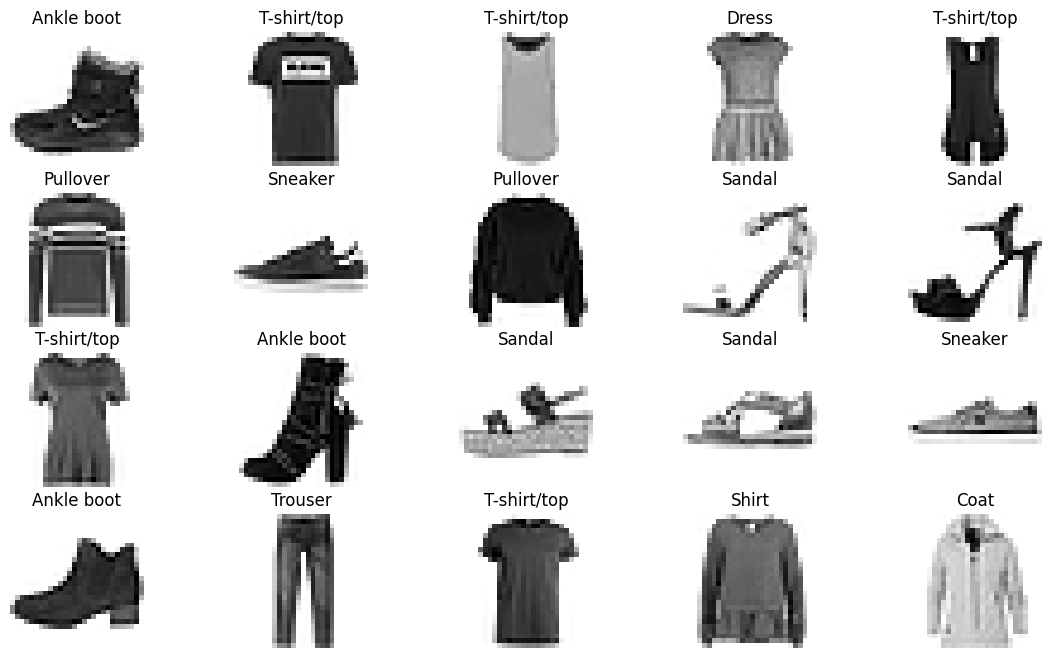

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Etiquetas de las clases
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Mostrar algunas imágenes
plt.figure(figsize=(14, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap="binary")
    plt.title(labels[y_train[i]])
    plt.axis("off")
plt.show()


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # Capa de entrada
    keras.layers.Dense(128, activation='relu'),   # Capa oculta
    keras.layers.Dense(10, activation='softmax')  # Capa de salida
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7804 - loss: 0.6308 - val_accuracy: 0.8399 - val_loss: 0.4437
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.3838 - val_accuracy: 0.8574 - val_loss: 0.3984
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8771 - loss: 0.3404 - val_accuracy: 0.8635 - val_loss: 0.3798
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8842 - loss: 0.3200 - val_accuracy: 0.8707 - val_loss: 0.3673
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8892 - loss: 0.2998 - val_accuracy: 0.8805 - val_loss: 0.3331
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8973 - loss: 0.2780 - val_accuracy: 0.8713 - val_loss: 0.3559
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9029 - loss: 0.2636 - val_accuracy: 0.8775 - val_loss: 0.3447
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9060 - loss: 0.2552 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nPrecisión en el conjunto de prueba:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.5016

Precisión en el conjunto de prueba: 0.8877000212669373


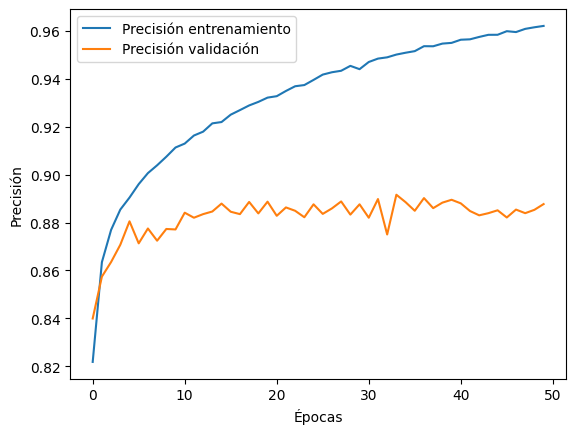

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


REGRESION LINEAL SIMPLE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
temperatura = np.array([15, 16, 18, 20, 21, 23, 25, 27, 30, 32])
ventas = np.array([500, 520, 560, 580, 600, 640, 680, 700, 760, 800])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    temperatura.reshape(-1, 1), ventas, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

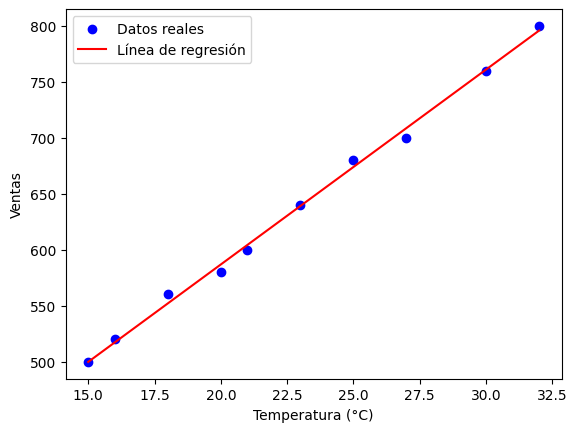

In [ ]:
plt.scatter(temperatura, ventas, color="blue", label="Datos reales")
plt.plot(temperatura, model.predict(temperatura.reshape(-1, 1)), color="red", label="Línea de regresión")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Ventas")
plt.legend()
plt.show()


In [ ]:
r_sq = model.score(X_test, y_test)
print('Coeficiente de determinación (R²):', r_sq)


Coeficiente de determinación (R²): 0.9996659605670523
